In [1]:

# #importing the required libraries
# import cv2
# import dlib

# #capture the video from default camera 
# webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')

# #load the pretrained HOG SVN model
# face_detection_classifier = dlib.get_frontal_face_detector()

# #initialize the array variable to hold all face locations in the frame
# all_face_locations = []

# #loop through every frame in the video
# while True:
#     #get the current frame from the video stream as an image
#     ret,current_frame = webcam_video_stream.read()
#     #create a grayscale image to pass into the dlib HOG detector
#     current_frame_to_detect_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
#     #resize the current frame to 1/4 size to proces faster
#     current_frame_small = cv2.resize(current_frame_to_detect_gray,(0,0),fx=0.25,fy=0.25)
#     #detect all face locations using the HOG SVN classifier
#     all_face_locations = face_detection_classifier(current_frame_small,1)    
#     #looping through the face locations
#     for index,current_face_location in enumerate(all_face_locations):
#         #start and end co-ordinates
#         left_pos, top_pos, right_pos, bottom_pos = current_face_location.left(),current_face_location.top(),current_face_location.right(),current_face_location.bottom()

#         #change the position maginitude to fit the actual size video frame
#         top_pos = top_pos*4
#         right_pos = right_pos*4
#         bottom_pos = bottom_pos*4
#         left_pos = left_pos*4
#         #printing the location of current face
#         print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
#         #draw rectangle around the face detected
#         cv2.rectangle(current_frame,(left_pos,top_pos),(right_pos,bottom_pos),(0,0,255),2)
#     #showing the current face with rectangle drawn
#     cv2.imshow("Webcam Video",current_frame)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# #release the stream and cam
# #close all opencv windows open
# webcam_video_stream.release()
# cv2.destroyAllWindows()        












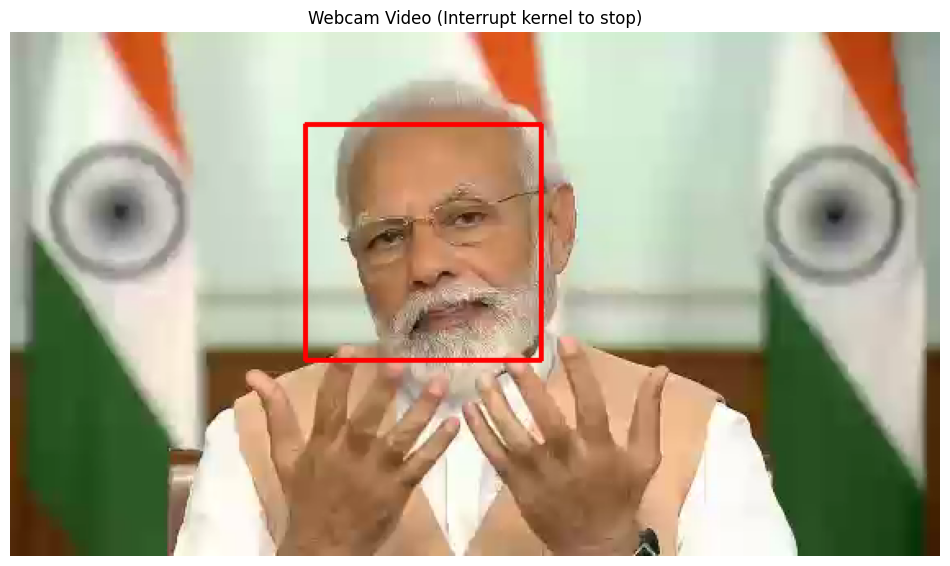

Video processing completed!


In [2]:
#importing the required libraries
import cv2
import dlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

%matplotlib inline

#capture the video from default camera 
webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')
#load the pretrained HOG SVN model
face_detection_classifier = dlib.get_frontal_face_detector()
#initialize the array variable to hold all face locations in the frame
all_face_locations = []

#create figure for displaying video
fig, ax = plt.subplots(figsize=(12, 8))

#loop through every frame in the video
while True:
    #get the current frame from the video stream as an image
    ret,current_frame = webcam_video_stream.read()
    
    #break if no frame returned (end of video)
    if not ret:
        break
    
    #create a grayscale image to pass into the dlib HOG detector
    current_frame_to_detect_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    #resize the current frame to 1/4 size to proces faster
    current_frame_small = cv2.resize(current_frame_to_detect_gray,(0,0),fx=0.25,fy=0.25)
    #detect all face locations using the HOG SVN classifier
    all_face_locations = face_detection_classifier(current_frame_small,1)    
    #looping through the face locations
    for index,current_face_location in enumerate(all_face_locations):
        #start and end co-ordinates
        left_pos, top_pos, right_pos, bottom_pos = current_face_location.left(),current_face_location.top(),current_face_location.right(),current_face_location.bottom()
        #change the position maginitude to fit the actual size video frame
        top_pos = top_pos*4
        right_pos = right_pos*4
        bottom_pos = bottom_pos*4
        left_pos = left_pos*4
        #printing the location of current face
        print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
        #draw rectangle around the face detected
        cv2.rectangle(current_frame,(left_pos,top_pos),(right_pos,bottom_pos),(0,0,255),2)
    
    #showing the current frame in Jupyter
    current_frame_rgb = cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(current_frame_rgb)
    ax.set_title("Webcam Video (Interrupt kernel to stop)")
    ax.axis('off')
    clear_output(wait=True)
    display(fig)

#release the stream and cam
webcam_video_stream.release()
plt.close()
print("Video processing completed!")